In [4]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Part A – Pandas (Data Manipulation Only)

1 Load the CSV file into a pandas DataFrame and display the first 5 rows.

2 Display the number of rows and columns in the dataset.

3 Print the data types of all columns and confirm that the Date column is not yet datetime.

4 Convert the Date column to datetime format.

5 Set the Date column as the index of the DataFrame.

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\sales_analysis_exercise.csv")
df.head()

,Date,Product,Region,Units_Sold,Revenue
0,2023-01-01,Product A,North,19,100.0
1,2023-01-02,Product B,South,42,102.5
2,2023-01-03,Product C,West,153,105.0
3,2023-01-04,Product A,North,78,107.5
4,2023-01-05,Product B,South,145,110.0


In [6]:
df.shape

(180, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        180 non-null    object 
 1   Product     180 non-null    object 
 2   Region      180 non-null    object 
 3   Units_Sold  180 non-null    int64  
 4   Revenue     180 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.2+ KB


In [8]:
df.dtypes

Date           object
Product        object
Region         object
Units_Sold      int64
Revenue       float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day

In [10]:
df.columns

Index(['Date', 'Product', 'Region', 'Units_Sold', 'Revenue', 'Day'], dtype='object')

In [11]:
df.set_index('Date', inplace=True)

In [12]:
print(df.index)


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
               '2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27',
               '2023-06-28', '2023-06-29'],
              dtype='datetime64[ns]', name='Date', length=180, freq=None)


In [13]:
df.reset_index(inplace=True)

# Part A – Pandas (Data Manipulation Only)

6 Check whether the dataset contains missing values and state your conclusion clearly.

7 Calculate the total revenue for each product and display the result as a table.

8 Calculate the total units sold for each region.

9 Calculate the average daily revenue for each product.

10 Identify which product generated the highest total revenue.

In [14]:
df.isnull().sum()

# the output shows us that they are no missing values

Date          0
Product       0
Region        0
Units_Sold    0
Revenue       0
Day           0
dtype: int64

In [15]:
df.columns

Index(['Date', 'Product', 'Region', 'Units_Sold', 'Revenue', 'Day'], dtype='object')

In [16]:
total_revenue_for_each_product = df.groupby('Product')['Revenue'].sum()
print(total_revenue_for_each_product)

Product
Product A    19275.0
Product B    19425.0
Product C    19575.0
Name: Revenue, dtype: float64


In [17]:
total_units_sold_for_each_Region = df.groupby('Units_Sold')['Region'].sum()
print(total_units_sold_for_each_Region)

Units_Sold
0      South
1      North
2      South
3       West
4       West
       ...  
175    North
176     West
177    South
178    South
179     West
Name: Region, Length: 180, dtype: object


In [18]:
Average_daily_revenue_for_each_product = (
    df.groupby(['Date', 'Product'], as_index=False)['Revenue'].mean()
)

print(Average_daily_revenue_for_each_product)

          Date    Product  Revenue
0   2023-01-01  Product A    100.0
1   2023-01-02  Product B    102.5
2   2023-01-03  Product C    105.0
3   2023-01-04  Product A    107.5
4   2023-01-05  Product B    110.0
..         ...        ...      ...
175 2023-06-25  Product B    537.5
176 2023-06-26  Product C    540.0
177 2023-06-27  Product A    542.5
178 2023-06-28  Product B    545.0
179 2023-06-29  Product C    547.5

[180 rows x 3 columns]


In [19]:
df.groupby('Product')['Revenue'].sum().idxmax()

'Product C'

# Part A – Pandas (Data Manipulation Only)

11 Resample the data by month and compute total monthly revenue.

12 Create a new column called Revenue_per_Unit (Revenue ÷ Units_Sold).

13 Display the top 5 days with the highest revenue.

14 Calculate a 7-day rolling average of revenue and store it in a new column.

15 Calculate the percentage of days where revenue is above the overall daily average.
Part

In [20]:
# monthly_revenue = df['Revenue'].resample('M').sum()
# print(monthly_revenue)
# the first way don't work because i don't set the column Date to index because it will do another problems 
df['Month'] = df['Date'].dt.month
df.groupby(df['Date'].dt.month)["Revenue"].sum()

Date
1     4262.5
2     5915.0
3     8835.0
4    10837.5
5    13562.5
6    14862.5
Name: Revenue, dtype: float64

In [22]:
df['Revenue_per_Unit'] = df['Revenue'] / df['Units_Sold']
print(df['Revenue_per_Unit'])

0       5.263158
1       2.440476
2       0.686275
3       1.378205
4       0.758621
         ...    
175     7.570423
176     5.094340
177    38.750000
178     5.923913
179     5.367647
Name: Revenue_per_Unit, Length: 180, dtype: float64


In [23]:
top_5_days = df.groupby(df['Date'].dt.day)["Revenue"].max().sort_values(ascending=False).head(5)
print(top_5_days)

Date
29    547.5
28    545.0
27    542.5
26    540.0
25    537.5
Name: Revenue, dtype: float64


In [ ]:
df['new_column_revenue'] = df.groupby(df['Date'].dt.day)['Revenue'].mean().head(7)

Date
1    287.916667
2    290.416667
3    292.916667
4    295.416667
5    297.916667
6    300.416667
7    302.916667
Name: Revenue, dtype: float64

In [34]:
daily_revenue = df.groupby('Date')['Revenue'].sum()

daily_avg = daily_revenue.mean()
print(daily_avg)

percentage_above_avg = (daily_revenue > daily_avg).mean() * 100
print(percentage_above_avg)


323.75
50.0


# Part B – Seaborn (Statistical Visualization)

1 Create a Seaborn line plot showing daily revenue over time.

2 Create a Seaborn histogram showing the distribution of revenue.

3 Create a Seaborn boxplot comparing revenue across regions.

4 Create a Seaborn boxplot comparing units sold across products.

5 Create a Seaborn bar plot showing total revenue per product.

6 Create a Seaborn bar plot showing average revenue per region.

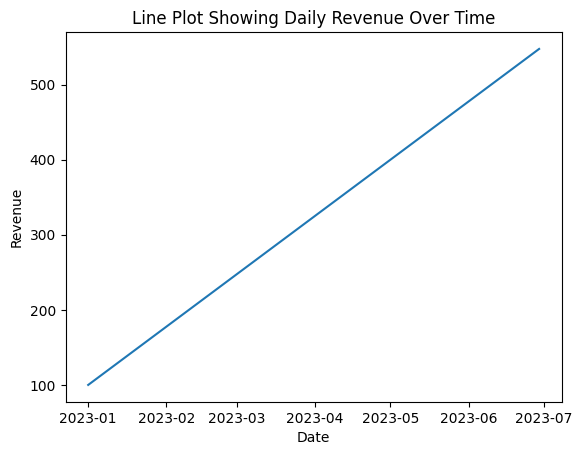

In [43]:
plt.Figure(figsize=(8,5))
sns.lineplot(data=df, x = 'Date', y = 'Revenue')
plt.title("Line Plot Showing Daily Revenue Over Time")
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.show()

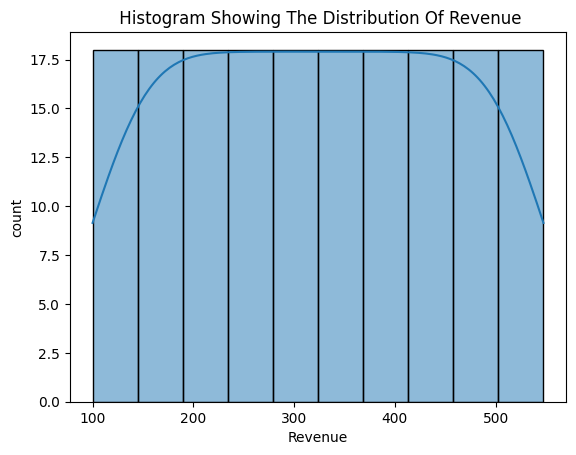

In [44]:
plt.Figure(figsize=(8,5))
sns.histplot(data=df, x = 'Revenue', bins=10, kde=True)
plt.title(" Histogram Showing The Distribution Of Revenue")
plt.xlabel('Revenue')
plt.ylabel('count')

plt.show()

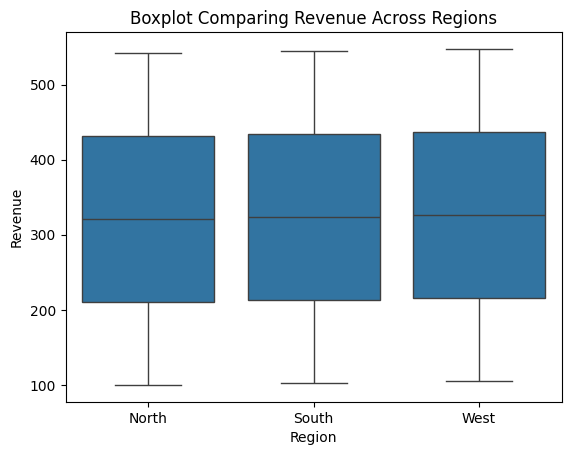

In [47]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Region', y = 'Revenue')
plt.title("Boxplot Comparing Revenue Across Regions")
plt.xlabel('Region')
plt.ylabel('Revenue')

plt.show()

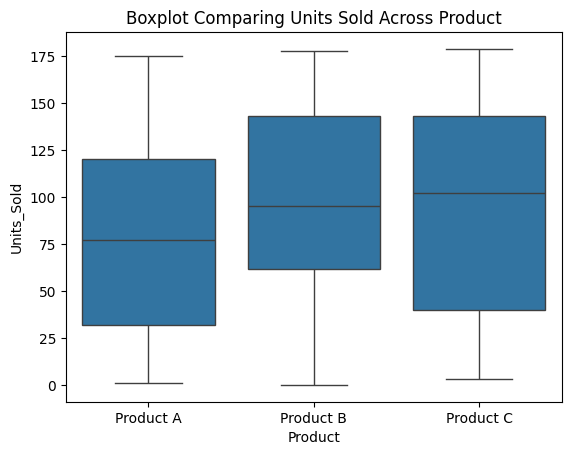

In [49]:
plt.Figure(figsize=(8,5))
sns.boxplot(data=df, x = 'Product', y = 'Units_Sold')
plt.title("Boxplot Comparing Units Sold Across Product")
plt.xlabel('Product')
plt.ylabel('Units_Sold')

plt.show()

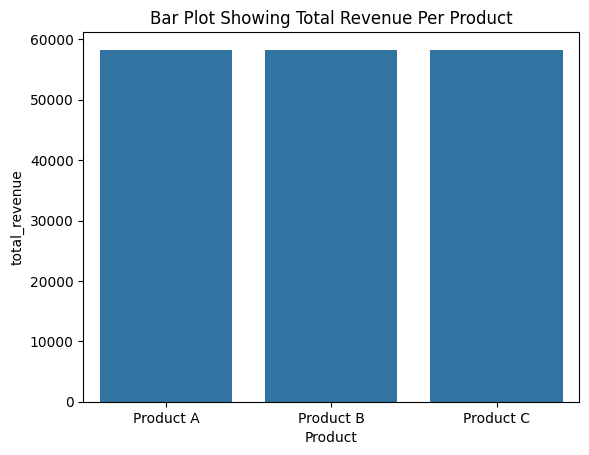

In [53]:
df['total_revenue'] = df['Revenue'].sum()

plt.Figure(figsize=(8,5))
sns.barplot(data=df, x='Product', y='total_revenue')
plt.title("Bar Plot Showing Total Revenue Per Product")
plt.xlabel('Product')
plt.ylabel('total_revenue')

plt.show()

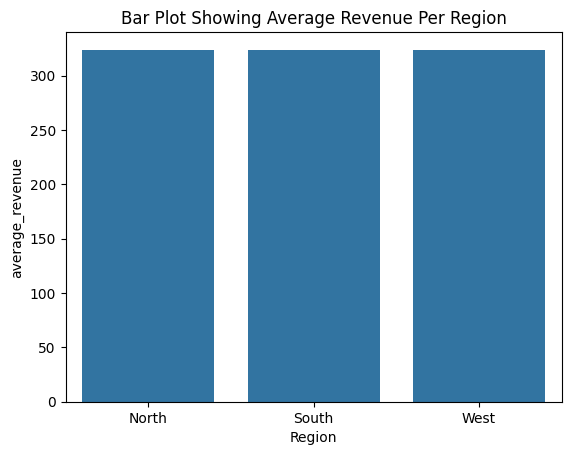

In [54]:
df['average_revenue'] = df['Revenue'].mean()

plt.Figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='average_revenue')
plt.title("Bar Plot Showing Average Revenue Per Region")
plt.xlabel('Region')
plt.ylabel('average_revenue')

plt.show()